In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import scipy as sc
from numpy.lib.stride_tricks import sliding_window_view
import bpmeth
import sympy as sp
import math

In [2]:
from magnet import Enge, spEnge, Magnet

In [3]:
def mavg(x, window_shape=4):
    return np.average(sliding_window_view(x, window_shape = window_shape), axis=1)

In [4]:
data_quad=np.loadtxt("field_map_straight_quad_resol_2mm.txt",skiprows=9)
quad = Magnet(data_quad)

In [5]:
quad.src["y"]

pyvista_ndarray([0.  , 0.  , 0.  , ..., 0.05, 0.05, 0.05], shape=(498576,))

In [6]:
data_cutquad=np.loadtxt("field_map_quad_edge_30deg_resol_2mm.txt",skiprows=9)
cutquad = Magnet(data_cutquad)

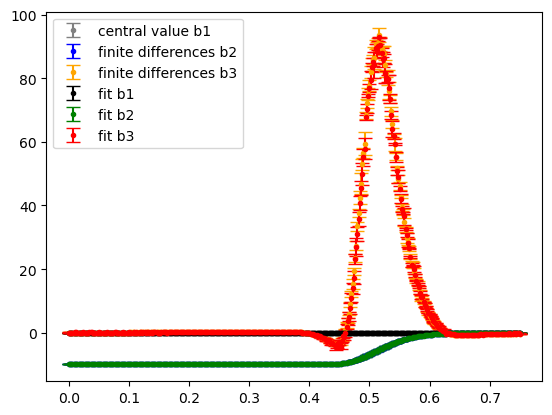

In [7]:
fig, ax = plt.subplots()
ax.errorbar(np.unique(cutquad.src['z']), [cutquad.get_b1(z)[0] for z in np.unique(cutquad.src['z'])], yerr=[cutquad.get_b1(z)[1] for z in np.unique(cutquad.src['z'])], label='central value b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), [cutquad.get_b2(z)[0] for z in np.unique(cutquad.src['z']) ], yerr=[ cutquad.get_b2(z)[1] for z in np.unique(cutquad.src['z']) ], label='finite differences b2', ls='', marker='.', color='blue', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), [cutquad.get_b3(z)[0] for z in np.unique(cutquad.src['z']) ], yerr=[ cutquad.get_b3(z)[1] for z in np.unique(cutquad.src['z']) ], label='finite differences b3', ls='', marker='.', color='orange', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='black', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='green', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='red', marker='.', ls='', capsize=5)
#ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,3], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,3], label='fit b4', color='purple', marker='.', ls='', capsize=5)
ax.legend()

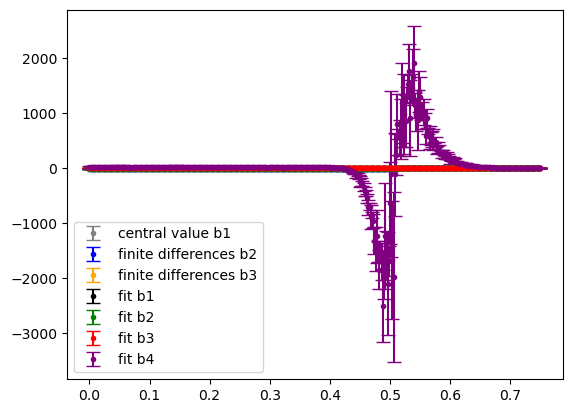

In [8]:
fig, ax = plt.subplots()
ax.errorbar(np.unique(quad.src['z']), [quad.get_b1(z)[0] for z in np.unique(quad.src['z'])], yerr=[quad.get_b1(z)[1] for z in np.unique(quad.src['z'])], label='central value b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), [quad.get_b2(z)[0] for z in np.unique(quad.src['z']) ], yerr=[ quad.get_b2(z)[1] for z in np.unique(quad.src['z']) ], label='finite differences b2', ls='', marker='.', color='blue', capsize=5)
ax.errorbar(np.unique(quad.src['z']), [quad.get_b3(z)[0] for z in np.unique(quad.src['z']) ], yerr=[ quad.get_b3(z)[1] for z in np.unique(quad.src['z']) ], label='finite differences b3', ls='', marker='.', color='orange', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='black', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='green', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='red', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,3], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,3], label='fit b4', color='purple', marker='.', ls='', capsize=5)
ax.legend()

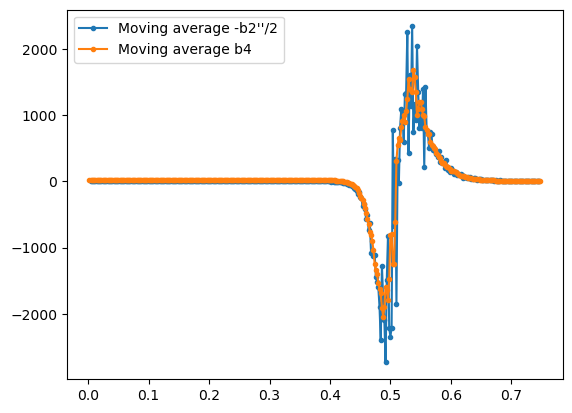

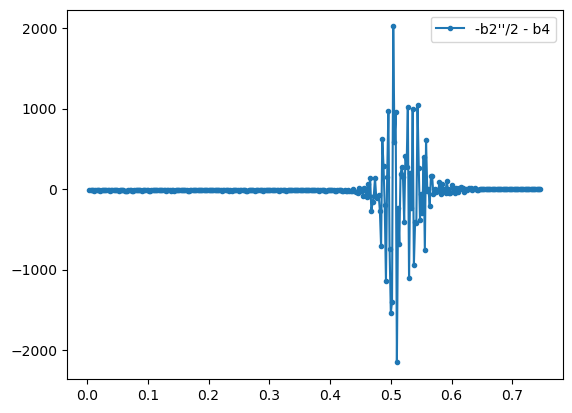

In [9]:
zvals = np.unique(quad.src['z'])
b2vals = quad.z_multipoles(3, xmax=0.025)[1][:,1]
b4vals = quad.z_multipoles(3, xmax=0.025)[1][:,3]

window_shape = 3
b2pp = np.diff(b2vals, 2)/np.diff(zvals)[1:]**2
b2ppav = mavg(b2pp, window_shape=window_shape)
b4av = mavg(b4vals, window_shape=window_shape)
zav = mavg(zvals, window_shape=window_shape)

fig, ax = plt.subplots()
plt.plot(zav[1:-1], -b2ppav/2, marker='.', label="Moving average -b2''/2")
plt.plot(zav, b4av, marker='.', label="Moving average b4")
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(zav[1:-1], -b2ppav/2 - b4av[1:-1], marker='.', label="-b2''/2 - b4")
plt.legend()
plt.show()

(array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105, 0.12 ,
        0.135, 0.15 , 0.165, 0.18 , 0.195, 0.21 , 0.225, 0.24 , 0.255,
        0.27 , 0.285, 0.3  , 0.315, 0.33 , 0.345, 0.36 , 0.375, 0.39 ,
        0.405, 0.42 , 0.435, 0.45 , 0.465, 0.48 , 0.495, 0.51 , 0.525,
        0.54 , 0.555, 0.57 , 0.585, 0.6  , 0.615, 0.63 , 0.645, 0.66 ,
        0.675, 0.69 , 0.705, 0.72 , 0.735, 0.75 ]),
 [np.float64(-0.04146020221183347),
  np.float64(-0.12410775508525208),
  np.float64(-0.0861333033139148),
  np.float64(-0.02223708643496064),
  np.float64(0.1604220040253918),
  np.float64(0.1467134655018311),
  np.float64(0.07931782092051154),
  np.float64(0.13824799979650407),
  np.float64(0.10950340725014646),
  np.float64(-0.02491990632851775),
  np.float64(0.05033089903897469),
  np.float64(-0.029680331963801106),
  np.float64(-0.025779853729684735),
  np.float64(-0.09895720062603985),
  np.float64(-0.05052691609336577),
  np.float64(0.0497203416401517),
  np.float64(0.15242756369

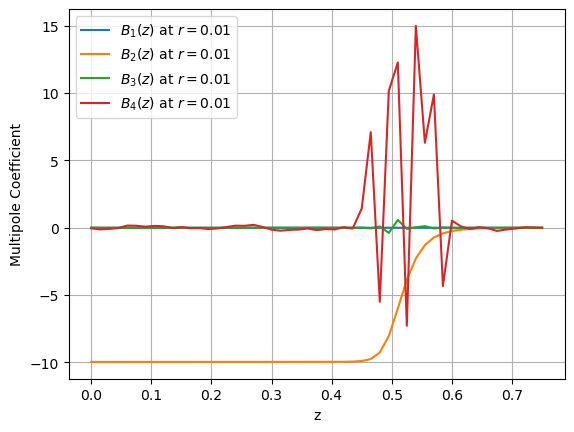

In [10]:
from fit_multipoles_fft import FieldMap

m=FieldMap("field_map_straight_quad_resol_2mm.txt")

fig, ax = plt.subplots()
m.plot_bn_z(1,0.01, ax=ax)
m.plot_bn_z(2,0.01, ax=ax)
m.plot_bn_z(3,0.01, ax=ax)
m.plot_bn_z(4,0.01, ax=ax)

(array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105, 0.12 ,
        0.135, 0.15 , 0.165, 0.18 , 0.195, 0.21 , 0.225, 0.24 , 0.255,
        0.27 , 0.285, 0.3  , 0.315, 0.33 , 0.345, 0.36 , 0.375, 0.39 ,
        0.405, 0.42 , 0.435, 0.45 , 0.465, 0.48 , 0.495, 0.51 , 0.525,
        0.54 , 0.555, 0.57 , 0.585, 0.6  , 0.615, 0.63 , 0.645, 0.66 ,
        0.675, 0.69 , 0.705, 0.72 , 0.735, 0.75 ]),
 [np.float64(-0.10632167388476141),
  np.float64(-0.11047329192174896),
  np.float64(-0.1455494107087735),
  np.float64(-0.10686832028386926),
  np.float64(0.007515032599940295),
  np.float64(0.09937924462386352),
  np.float64(0.07908416312246148),
  np.float64(-0.15094869174202322),
  np.float64(-0.016048947308756684),
  np.float64(0.026069258110011446),
  np.float64(0.013859454909983493),
  np.float64(-0.14302267439695154),
  np.float64(0.06342625579429696),
  np.float64(-0.21945599551341047),
  np.float64(-0.21297970756663134),
  np.float64(-0.06210362822865867),
  np.float64(0.08078

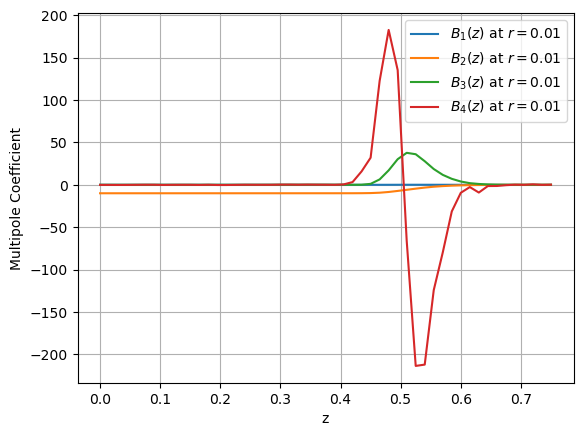

In [11]:
mcut=FieldMap("field_map_quad_edge_30deg_resol_2mm.txt")

fig, ax = plt.subplots()
mcut.plot_bn_z(1,0.01, ax=ax)
mcut.plot_bn_z(2,0.01, ax=ax)
mcut.plot_bn_z(3,0.01, ax=ax)
mcut.plot_bn_z(4,0.01, ax=ax)


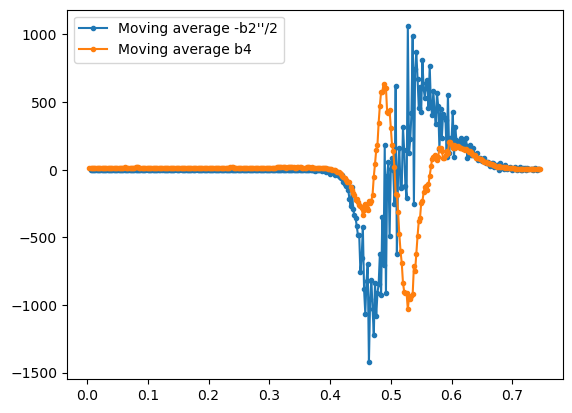

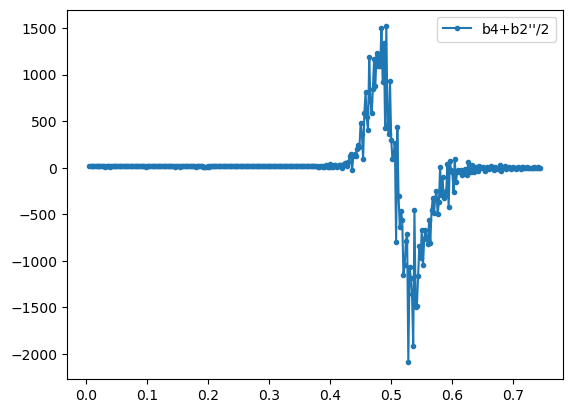

In [12]:
zvals = np.unique(quad.src['z'])
b2vals = cutquad.z_multipoles(3, xmax=0.025)[1][:,1]
b4vals = cutquad.z_multipoles(3, xmax=0.025)[1][:,3]

window_shape = 5
b2pp = np.diff(b2vals, 2)/np.diff(zvals)[1:]**2
b2ppav = mavg(b2pp, window_shape=window_shape)
b4av = mavg(b4vals, window_shape=window_shape)
zav = mavg(zvals, window_shape=window_shape)

fig, ax = plt.subplots()
plt.plot(zav[1:-1], -b2ppav/2, marker='.', label="Moving average -b2''/2")
plt.plot(zav, b4av, marker='.', label="Moving average b4")
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(zav[1:-1], b4av[1:-1] + b2ppav/2, marker='.', label="b4+b2''/2")
plt.legend()
plt.show()

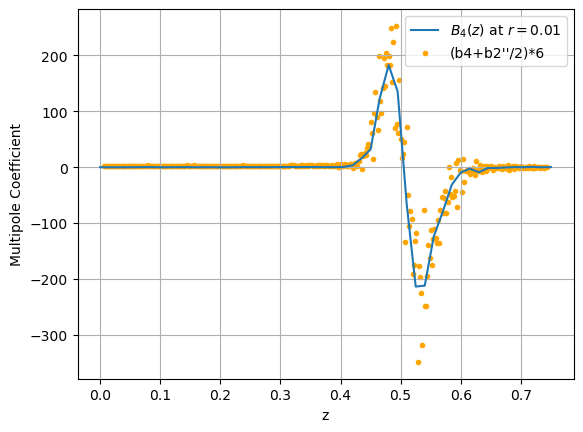

In [13]:
# b4_us = 6 b4_forest
fig, ax = plt.subplots()
mcut.plot_bn_z(4,0.01, ax=ax)  # FFT, forest
ax.scatter(zav[1:-1], (b4av[1:-1] + b2ppav/2)/6, marker='.', label="(b4+b2''/2)*6", color="orange")  # Derivatives, us
#ax.scatter(zav[1:-1], b2ppav/2/6, marker='.', label="b2''/2/6", color="red")  # Derivatives, us
plt.legend()


Good agreement between the b4 determined with a fourier transform and the corrected b4 with b2 contribution from derivatives. Explanation for the leftover octupole component? Not given by our model!

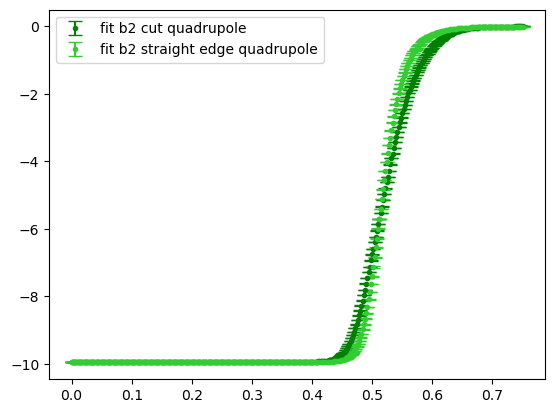

In [14]:
fig, ax = plt.subplots()
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2 cut quadrupole', color='green', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(quad.src['z']), quad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=quad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2 straight edge quadrupole', color='limegreen', marker='.', ls='', capsize=5)
plt.legend()

In [15]:
integrated_b1 = np.trapezoid([cutquad.get_b1(z)[0] for z in np.unique(quad.src['z'])])
integrated_b2 = np.trapezoid([cutquad.get_b2(z)[0] for z in np.unique(quad.src['z'])])
integrated_b3 = np.trapezoid([cutquad.get_b3(z)[0] for z in np.unique(quad.src['z'])])
print(f"Integrated b1: {integrated_b1}")
print(f"Integrated b2: {integrated_b2}")
print(f"Integrated b3: {integrated_b3}")
xtest=0.025
print(f"Integrated effect at x={xtest}: {integrated_b1}")
print(f"Integrated effect at x={xtest}: {integrated_b2*xtest}")
print(f"Integrated effect at x={xtest}: {integrated_b3*xtest**2/2.0}")

Integrated b1: 4.867213763430696
Integrated b2: -2611.5126984333297
Integrated b3: 3124.5094476226955
Integrated effect at x=0.025: 4.867213763430696
Integrated effect at x=0.025: -65.28781746083324
Integrated effect at x=0.025: 0.9764092023820925


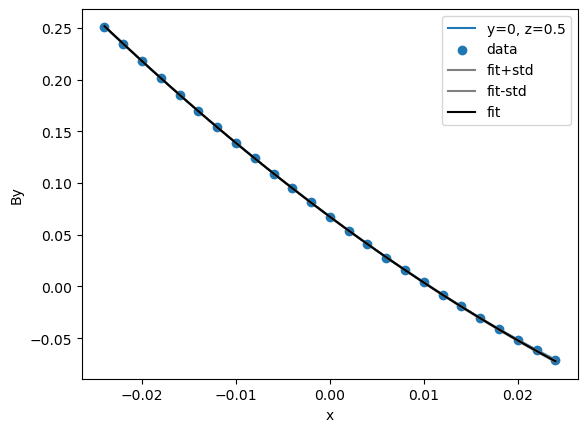

In [16]:
fig, ax = plt.subplots()
coeffs, coeffsstd = cutquad.fit_xprofile(0, 0.5, "By", 2, ax=ax, xmax=0.025)

### Cut model (Silke model)

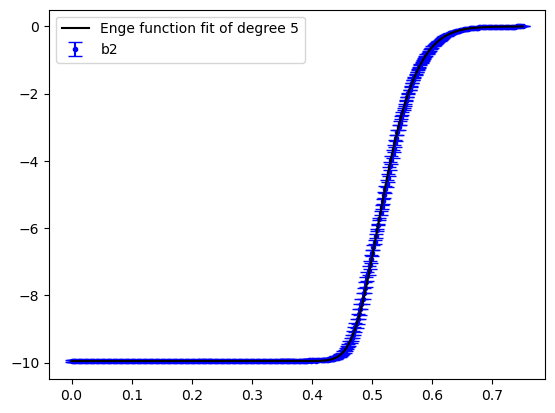

In [17]:
params, cov = cutquad.fit_b2_enge()

np.float64(0.5247858492719366)

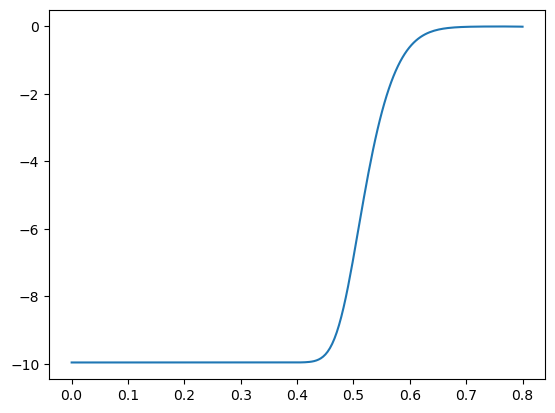

In [18]:
ss = np.linspace(0, 0.8, 200)
plt.plot(ss, Enge(ss, *params), label='enge fit')
sedge = np.trapezoid(Enge(ss, *params), x=ss) / params[0]
sedge


Cutting magnet at angle -0.5235987755982988...


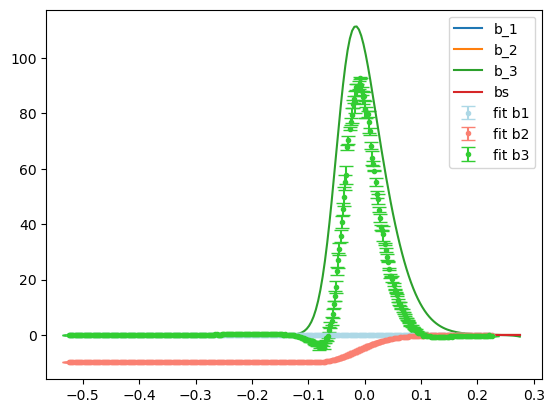

In [26]:
s = sp.symbols('s')
b2 = sp.Function('b2')
quadfringe = bpmeth.FieldExpansion(b=("0", b2(s)))

cut_quadfringe = quadfringe.cut_at_angle(-30/180*np.pi)
# rot_quadfringe = quadfringe.transform(-30/180*np.pi)

# Rotated model still to add, quadrupole measured at 30 degrees

# Substitute b2 with actual profile
cut_enge_quadfringe = bpmeth.FieldExpansion(b=[cut_quadfringe.b[i].replace(b2, lambda s : spEnge(s+sedge, *params)).doit() for i in range(3)])
# rot_enge_quadfringe = bpmeth.FieldExpansion(b=[rot_quadfringe.b[i].replace(b2, lambda s : spEnge(s+sedge, *params)).doit() for i in range(3)])

fig, ax = plt.subplots()
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='lightblue', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='salmon', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='limegreen', marker='.', ls='', capsize=5)
# ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,3], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,3], label='fit b4', color='violet', marker='.', ls='', capsize=5)
cut_enge_quadfringe.plot_components(smin=0-sedge, smax=0.8-sedge, ns=200, ax=ax)
# rot_enge_quadfringe.plot_components(smin=0-sedge, smax=0.8-sedge, ns=200, ax=ax)
plt.legend()


In [24]:
print(cut_enge_quadfringe.integrate_components(smin=0-sedge, smax=0.8-sedge)[2]*0.75)
print(np.trapz(cutquad.z_multipoles(3, xmax=0.025)[1][:,2], np.unique(cutquad.src['z'])-sedge))


8.61192415059725
6.152493999372859


/tmp/silke/ipykernel_1346655/105984054.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.trapz(cutquad.z_multipoles(3, xmax=0.025)[1][:,2], np.unique(cutquad.src['z'])-sedge))


In [69]:
cut_quadfringe.b

(0,
 b2(1.0*s),
 1.15470053837925*Subs(Derivative(b2(_xi_1), _xi_1), _xi_1, 1.0*s),
 1.0*Subs(Derivative(b2(_xi_1), (_xi_1, 2)), _xi_1, 1.0*s),
 0.769800358919501*Subs(Derivative(b2(_xi_1), (_xi_1, 3)), _xi_1, 1.0*s))

The model is reasonably close to reality.

### Rotated cut-edge model (Riccardo model)

In [70]:
ss = np.unique(cutquad.src['z'])-sedge 
for i in range(len(cut_enge_quadfringe.b)):
    print(f"Integral for b{i+1}:")
    print(f"- Integral for model: \t {np.trapezoid([cut_enge_quadfringe.b[i].subs({cut_enge_quadfringe.s:sval}).evalf() for sval in ss], ss)}")
    print(f"- Integral for fieldmap: \t {np.trapezoid(cutquad.z_multipoles(3, xmax=0.025)[1][:,i], x=ss)}")

Integral for b1:
- Integral for model: 	 0
- Integral for fieldmap: 	 0.009707139181695067
Integral for b2:
- Integral for model: 	 -5.22412938422093
- Integral for fieldmap: 	 -5.223025553030931
Integral for b3:
- Integral for model: 	 11.4898965211702
- Integral for fieldmap: 	 6.152493999372859


/home/silke/miniforge3/envs/xsuite/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


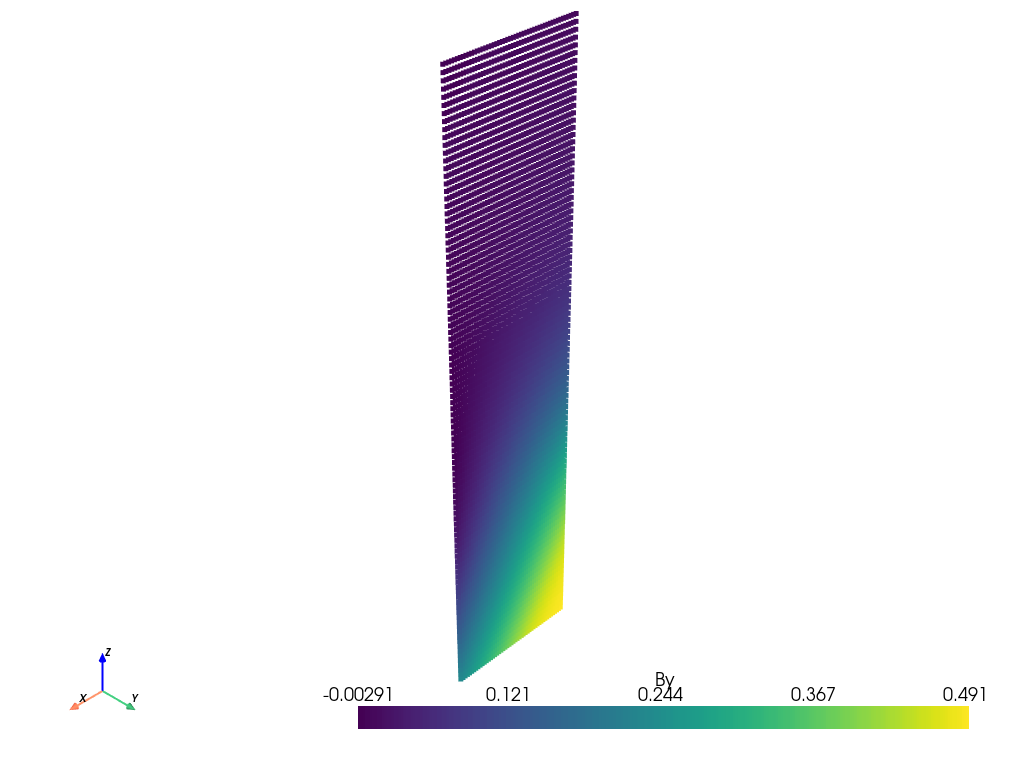

In [71]:
x = np.linspace(-0.02, 0.02, 50)
y = 0
s = np.linspace(-0.08, 0.1, 100)

X, Y, S = np.meshgrid(x, y, s)

angle = -30/180*np.pi
Xrot = X*np.cos(angle) - S*np.sin(angle)
Srot = X*np.sin(angle) + S*np.cos(angle) + sedge

Bx = cutquad.interpolate_points(Xrot, Y, Srot, 'Bx')
By = cutquad.interpolate_points(Xrot, Y, Srot, 'By')
Bz = cutquad.interpolate_points(Xrot, Y, Srot, 'Bz')

data_rotquad = np.array([X.flatten(), Y.flatten(), S.flatten()+sedge, Bx.flatten(), By.flatten(), Bz.flatten()]).T
rotatedquad = Magnet(data_rotquad)
rotatedquad.plot()


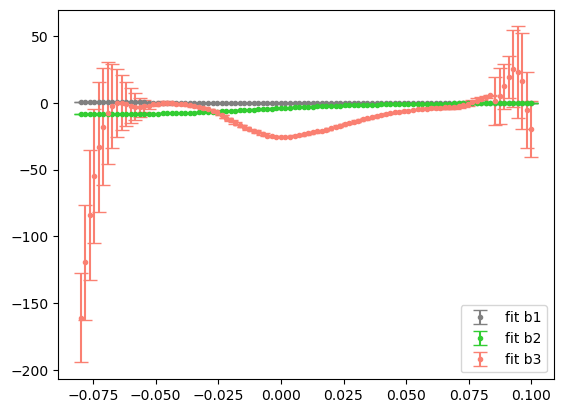

In [72]:
fig, ax = plt.subplots()
ax.errorbar(np.unique(rotatedquad.src['z'])-sedge, rotatedquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=rotatedquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(rotatedquad.src['z'])-sedge, rotatedquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=rotatedquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='limegreen', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(rotatedquad.src['z'])-sedge, rotatedquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=rotatedquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='salmon', marker='.', ls='', capsize=5)
plt.legend()

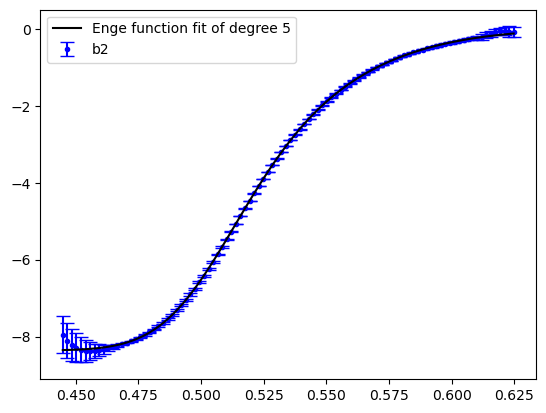

In [73]:
rotparams, rotcov = rotatedquad.fit_b2_enge(guess=params)

Rotating over angle -0.5235987755982988 to new straight frame...


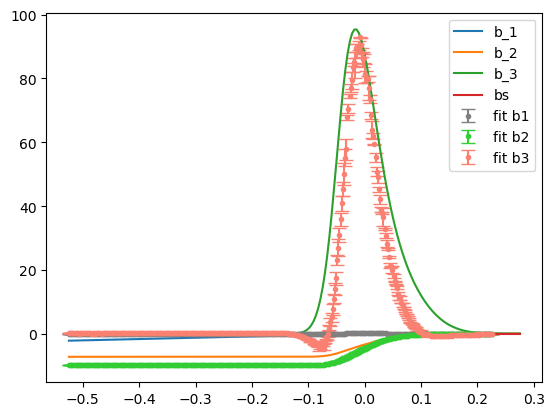

In [74]:
s = sp.symbols('s')
b2 = sp.Function('b2')
quadfringe = bpmeth.FieldExpansion(b=("0", b2(s)))

rot_quadfringe = quadfringe.transform(-30/180*np.pi)

# Rotated model still to add, quadrupole measured at 30 degrees

# Substitute b2 with actual profile
rot_enge_quadfringe = bpmeth.FieldExpansion(b=[rot_quadfringe.b[i].replace(b2, lambda s : spEnge(s+sedge, *rotparams)).doit() for i in range(3)])

fig, ax = plt.subplots()
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='limegreen', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='salmon', marker='.', ls='', capsize=5)
# ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,3], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,3], label='fit b4', color='violet', marker='.', ls='', capsize=5)
rot_enge_quadfringe.plot_components(smin=0-sedge, smax=0.8-sedge, ns=200, ax=ax)
plt.legend()

This method does not make a lot of sense: the quadrupole component obtained in the body in this way is not the real quadrupole component, as part of it is hidden in an s-dependent dipole in the fit.

### PTC-like model: rotating the straight hard edge

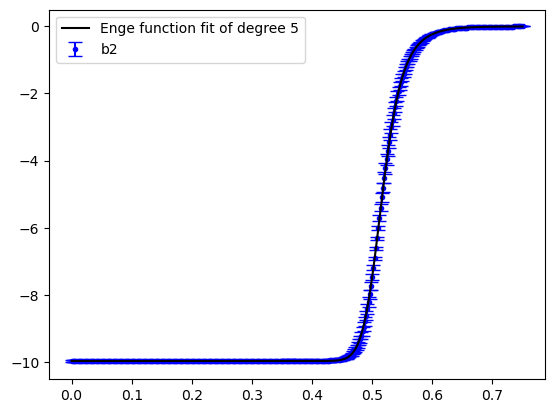

In [75]:
strparams, strcov = quad.fit_b2_enge()

Rotating over angle -0.5235987755982988 to new straight frame...


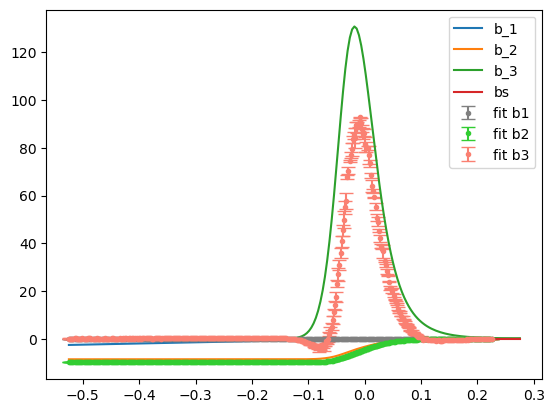

In [76]:
s = sp.symbols('s')
b2 = sp.Function('b2')
quadfringe = bpmeth.FieldExpansion(b=("0", b2(s)))

rot_quadfringe = quadfringe.transform(-30/180*np.pi)

# Rotated model still to add, quadrupole measured at 30 degrees

# Substitute b2 with actual profile
rot_enge_quadfringe = bpmeth.FieldExpansion(b=[rot_quadfringe.b[i].replace(b2, lambda s : spEnge(s+sedge, *strparams)).doit() for i in range(3)])

fig, ax = plt.subplots()
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='limegreen', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='salmon', marker='.', ls='', capsize=5)
# ax.errorbar(np.unique(cutquad.src['z'])-sedge, cutquad.z_multipoles(3, xmax=0.025)[1][:,3], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,3], label='fit b4', color='violet', marker='.', ls='', capsize=5)
rot_enge_quadfringe.plot_components(smin=0-sedge, smax=0.8-sedge, ns=200, ax=ax)
plt.legend()

In [77]:
ss = np.unique(cutquad.src['z'])-sedge 
for i in range(len(cut_enge_quadfringe.b)):
    print(f"Integral for b{i+1}:")
    print(f"- Integral for PTC-like model: \t {np.trapezoid([rot_enge_quadfringe.b[i].subs({rot_enge_quadfringe.s:sval}).evalf() for sval in ss], ss)}")
    print(f"- Integral for cut model: \t {np.trapezoid([cut_enge_quadfringe.b[i].subs({cut_enge_quadfringe.s:sval}).evalf() for sval in ss], ss)}")
    print(f"- Integral for fieldmap: \t {np.trapezoid(cutquad.z_multipoles(3, xmax=0.025)[1][:,i], x=ss)}")

Integral for b1:
- Integral for PTC-like model: 	 -0.682077061715924
- Integral for cut model: 	 0
- Integral for fieldmap: 	 0.009707139181695067
Integral for b2:
- Integral for PTC-like model: 	 -4.47532198613141
- Integral for cut model: 	 -5.22412938422093
- Integral for fieldmap: 	 -5.223025553030931
Integral for b3:
- Integral for PTC-like model: 	 11.6030582361752
- Integral for cut model: 	 11.4898965211702
- Integral for fieldmap: 	 6.152493999372859


### Assuming a quadrupole field profile as the elena enge

In [78]:
params

array([   -9.95535559, -3657.9115118 ,  8902.80204752, -8076.1058086 ,
        3271.81392715,  -501.90019778])

In [79]:
ELENA_Enge = [-3.85190565e+03, 1.29508736e+03, -1.29954076e+02, 2.50076967e+01, 5.22942000e-01]
ELENA_gap = 0.076  # The gap


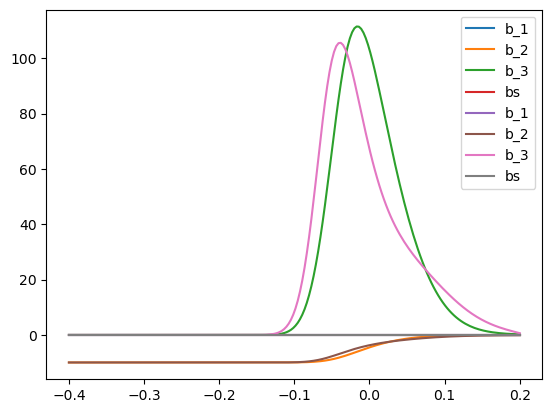

In [80]:
cut_elena_quadfringe = bpmeth.FieldExpansion(b=[cut_quadfringe.b[i].replace(b2, lambda s : spEnge(s, params[0], *ELENA_Enge)).doit() for i in range(3)])

fig, ax = plt.subplots()
cut_enge_quadfringe.plot_components(smin=-0.4, smax=0.2, ns=200, ax=ax)
cut_elena_quadfringe.plot_components(smin=-0.4, smax=0.2, ns=200, ax=ax)

In [81]:
ss = np.linspace(-0.4, 0.2, 200)
print(f"- Integral for model: \t {np.trapezoid([cut_enge_quadfringe.b[2].subs({cut_enge_quadfringe.s:sval}).evalf() for sval in ss], ss)}")
print(f"- Integral for ELENA: \t {np.trapezoid([cut_elena_quadfringe.b[2].subs({cut_elena_quadfringe.s:sval}).evalf() for sval in ss], ss)}")
print(f"b2 value: {params[0]}")

- Integral for model: 	 11.4869218539240
- Integral for ELENA: 	 11.3720599644930
b2 value: -9.955355589949077
